In [1]:
#import the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
plt.style.use('fivethirtyeight')


In [2]:
data = pd.read_csv('kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.drop('id', axis=1, inplace=True)

In [7]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
data.groupby('classification')['rbc'].apply(lambda x: x.isnull().sum())

classification
ckd       142
ckd\t       1
notckd      9
Name: rbc, dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
# Rename columns to make them more readable
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
data.rename(columns=col, inplace=True)
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [13]:
#convert object type to numeric type
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')

In [14]:
#Get the number of unique values for each column
for col in data.columns:
    print(f'{col} has {data[col].nunique()} values')

age has 76 values
blood_pressure has 10 values
specific_gravity has 5 values
albumin has 6 values
sugar has 6 values
red_blood_cells has 2 values
pus_cell has 2 values
pus_cell_clumps has 2 values
bacteria has 2 values
blood_glucose_random has 146 values
blood_urea has 118 values
serum_creatinine has 84 values
sodium has 34 values
potassium has 40 values
hemoglobin has 115 values
packed_cell_volume has 42 values
white_blood_cell_count has 89 values
red_blood_cell_count has 45 values
hypertension has 2 values
diabetes_mellitus has 5 values
coronary_artery_disease has 3 values
appetite has 2 values
pedal_edema has 2 values
anemia has 2 values
class has 3 values


In [15]:
#classifying columns into categorical and numerical columns 

cat_cols = [col for col in data.columns if data[col]. dtype == 'object']
num_cols = [col for col in data.columns if data[col]. dtype != 'object']

In [16]:
len(cat_cols)

11

In [17]:
len(num_cols)

14

In [18]:
#View the specific values in the cat_column
for col in cat_cols:
    print(f'{col} has {data[col].unique()} values')

red_blood_cells has [nan 'normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal' nan] values
pus_cell_clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
coronary_artery_disease has ['no' 'yes' '\tno' nan] values
appetite has ['good' 'poor' nan] values
pedal_edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'ckd\t' 'notckd'] values


In [19]:
#Replacing non-standard values

data['diabetes_mellitus'].replace(to_replace={'\tno':'no', '\tyes': 'yes', ' yes': 'yes' }, inplace=True)
data['coronary_artery_disease'].replace(to_replace={'\tno': 'no'}, inplace=True)
data['class'].replace(to_replace={'ckd\t': 'ckd', 'notckd':'not ckd'}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1740\456017065.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diabetes_mellitus'].replace(to_replace={'\tno':'no', '\tyes': 'yes', ' yes': 'yes' }, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1740\456017065.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [20]:
for col in cat_cols:
    print(f'{col} has {data[col].unique()} values')

red_blood_cells has [nan 'normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal' nan] values
pus_cell_clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes_mellitus has ['yes' 'no' nan] values
coronary_artery_disease has ['no' 'yes' nan] values
appetite has ['good' 'poor' nan] values
pedal_edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'not ckd'] values


In [21]:
#convert the class column to binary (0 and 1)

data['class'] = data['class'].map({'ckd':0, 'not ckd': 1})
data['class'] = pd.to_numeric(data['class'], errors='coerce')

In [22]:
#Numeric values 

for col in num_cols:
    print(f'{col} has {data[col].unique()} values')

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values
blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values
specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values
albumin has [ 1.  4.  2.  3.  0. nan  5.] values
sugar has [ 0.  3.  4.  1. nan  2.  5.] values
blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 

#### Exploratory Data Analysis (EDA)

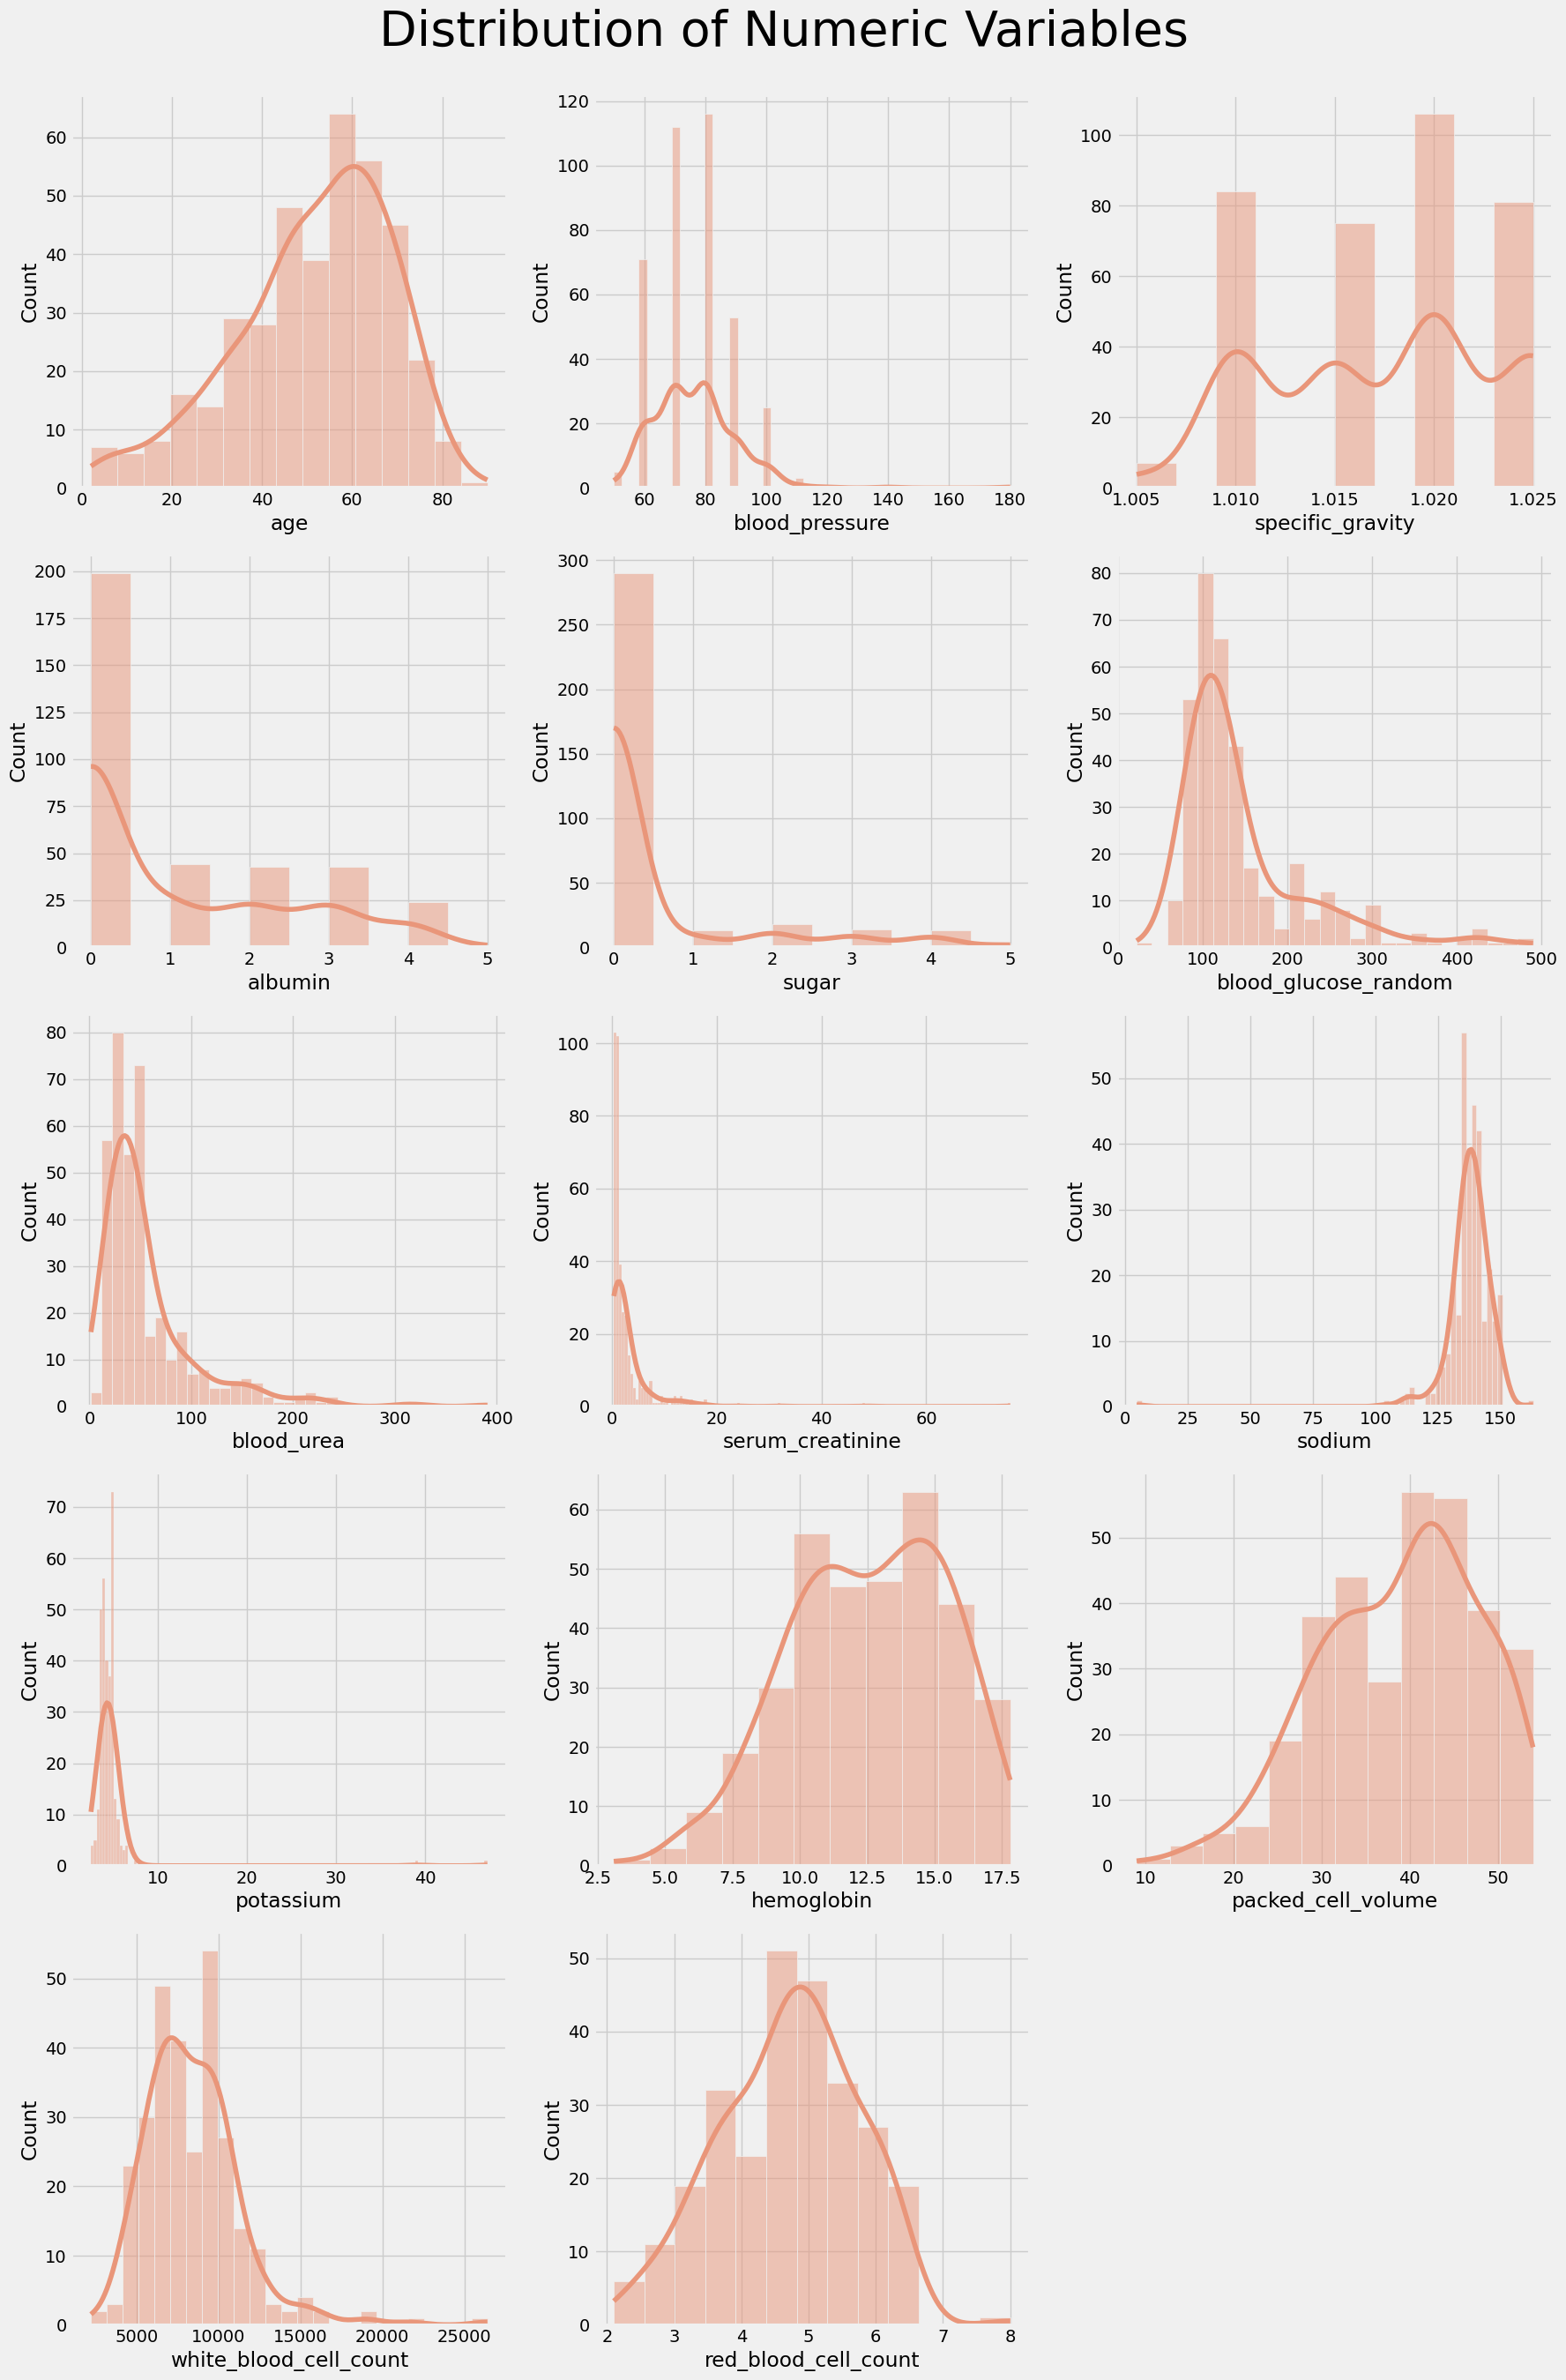

In [23]:
#distribution of numeric variables
plt.figure(figsize=(18,27))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(x=data[col], kde=True, color='darksalmon')
        plt.xlabel(col)
        
    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

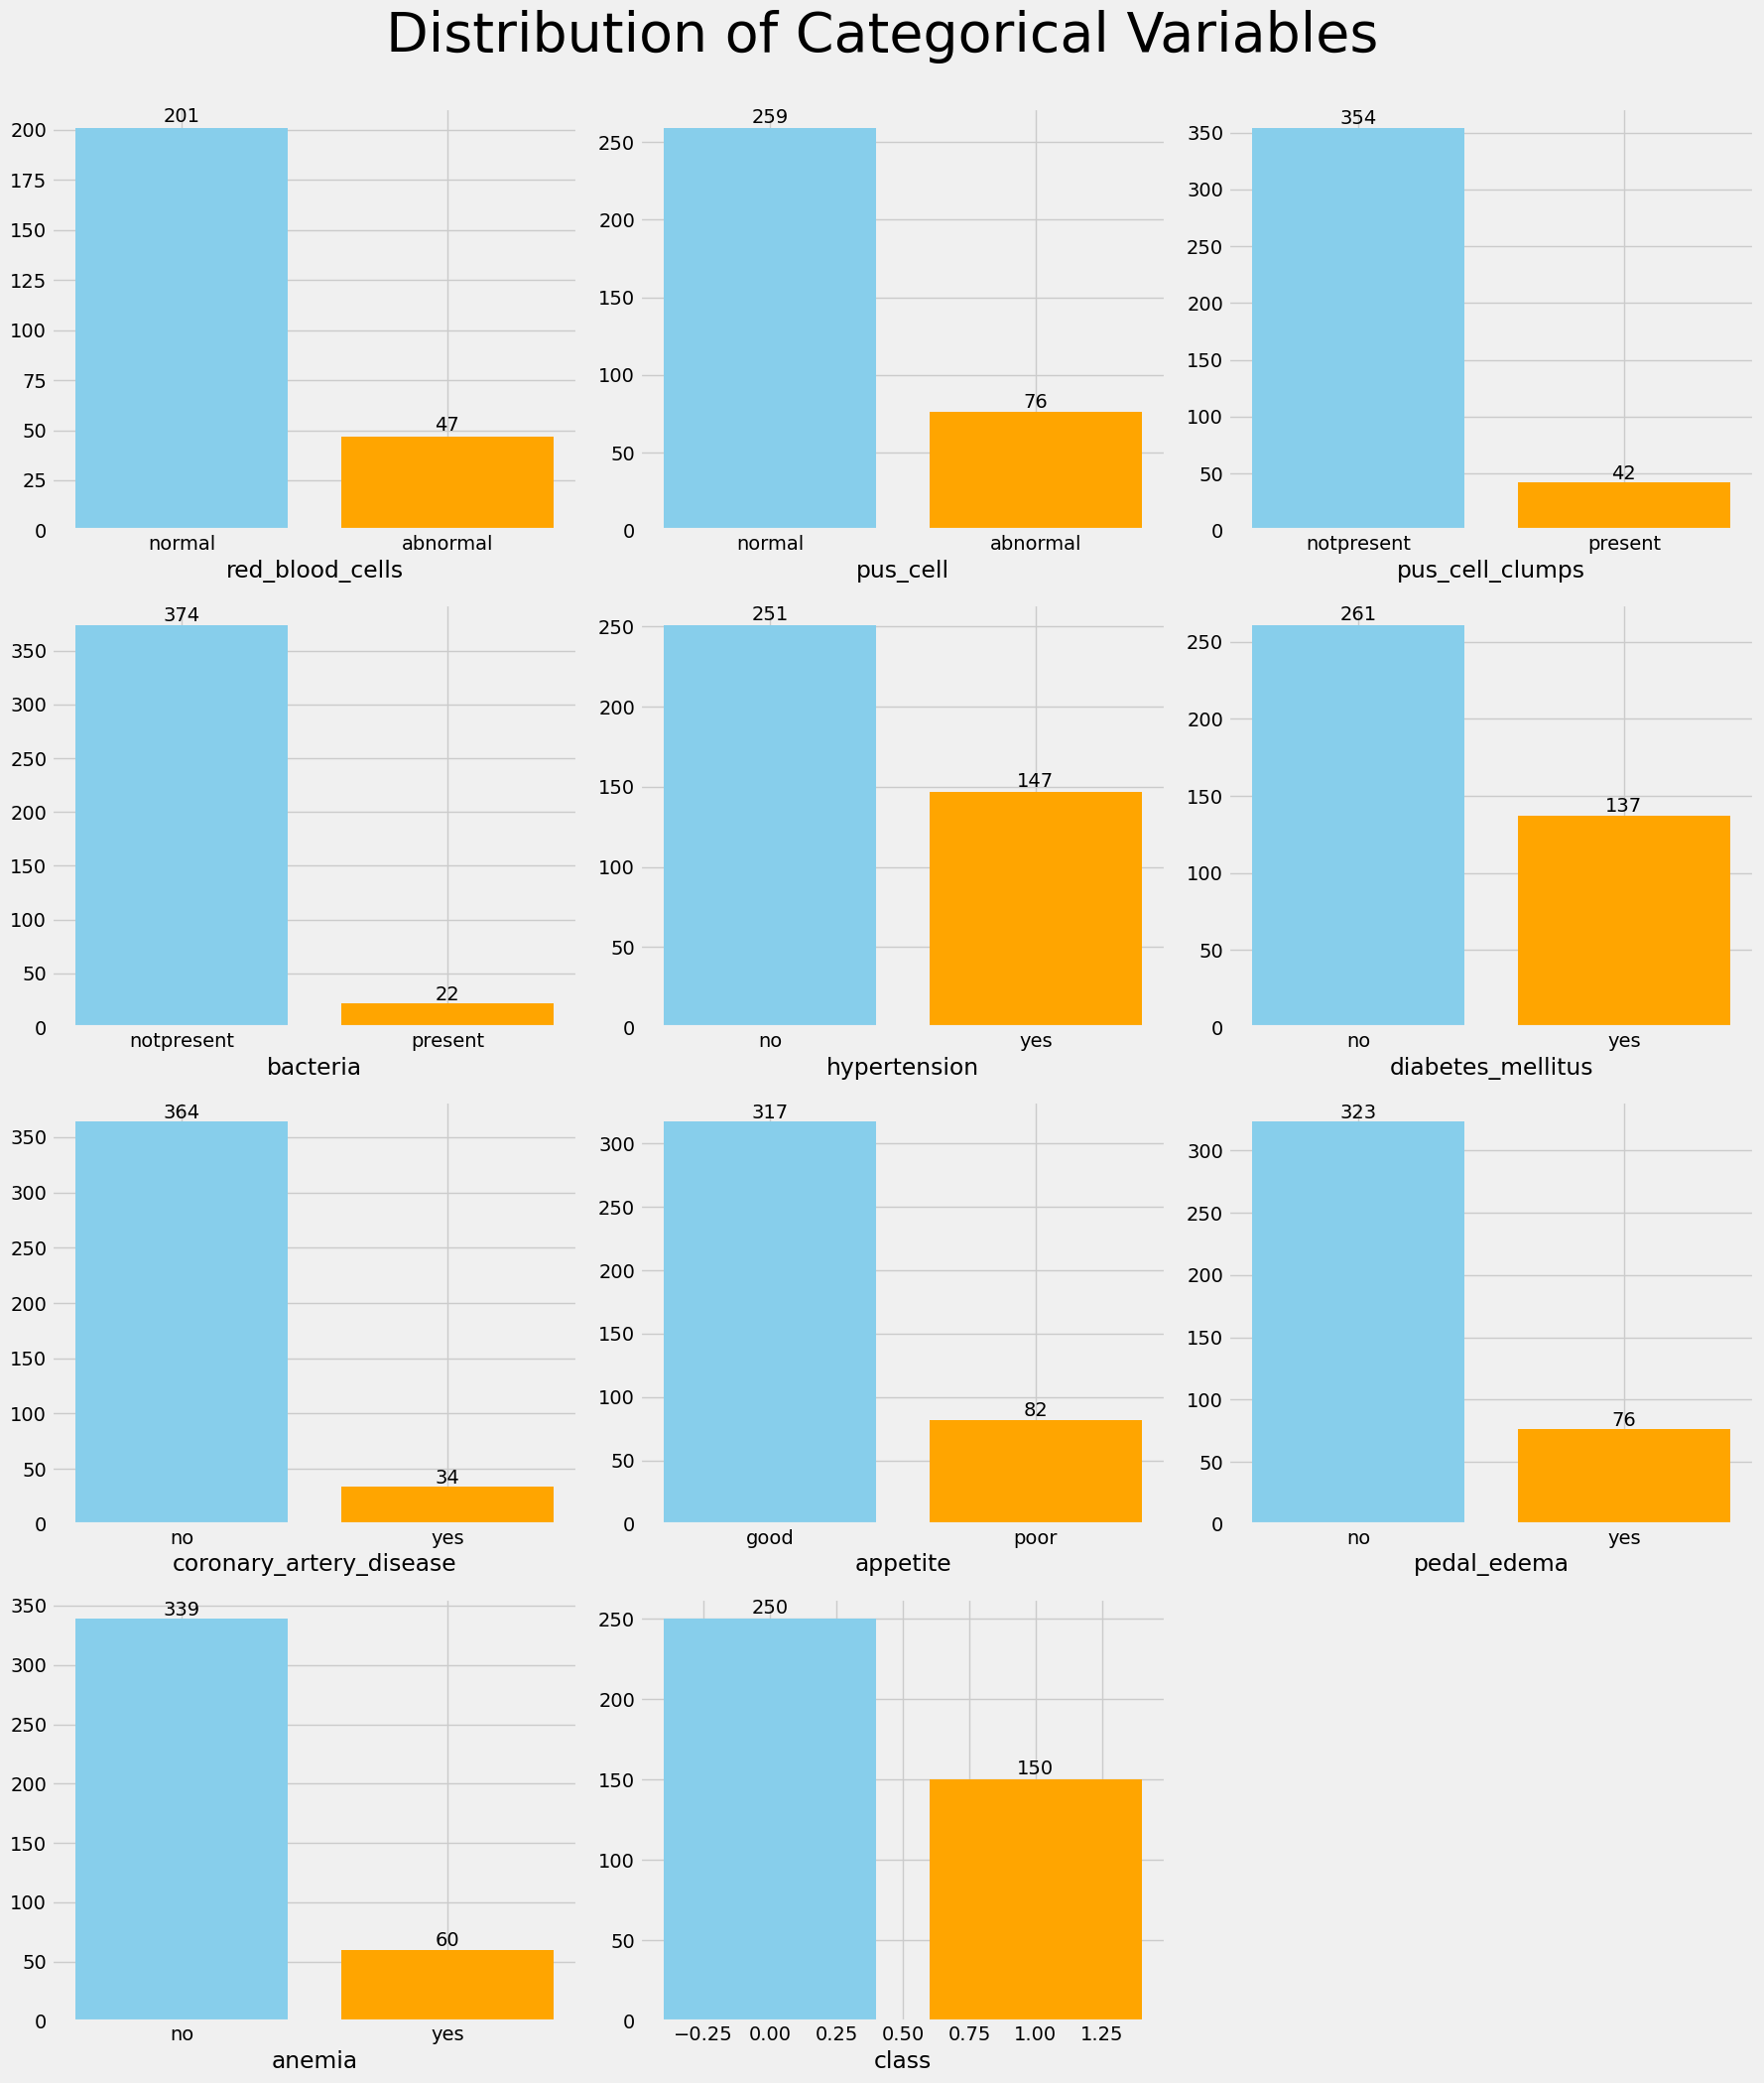

In [24]:
# Distribution of categorical variables
plt.figure(figsize=(18, 21))
plotnumber = 1

colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral', 'cyan', 'pink']

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        # sns.countplot(x=data[col], palette = 'pastel')
        counts = data[col].value_counts()
        ax.bar(counts.index, counts.values, color=colors[:len(counts)])
        
        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{p.get_height()}', ha="center")
            
        plt.xlabel(col)
        
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

### Handling Missing Data

In [25]:
#Missing values for numerical Columns

data[num_cols].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [26]:
#Missing values for categorical columns
data[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [27]:
#fill the missing values in num_cols using multiple iterations of interpolations

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)

data[num_cols] = imputer.fit_transform(data[num_cols])


In [44]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,264.438462,...,38.0,6000.0,3.517405,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,3.389510,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


In [28]:
data[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [29]:
# For feature columns with many missing values: use random values to fill in
def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample
    

# For feature columns with relatively few missing values: use the mode to fill in
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)


# For the categorical columns red_blood_cells and pus_cell, use random sampling to fill
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')


# For other categorical data columns, use the mode to fill
for col in cat_cols:
    impute_mode(col)

In [30]:
data[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

### ML Preparation

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
ind_col = [col for col in data.columns if col != 'class']

x = data[ind_col]
y = data['class']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [34]:
x

array([[-0.20692001,  0.26913901,  0.44975001, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.57425325, -1.89408628,  0.44975001, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.60143768,  0.26913901, -1.10527352, ...,  1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.28555407,  0.26913901,  0.44975001, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-1.99685489, -1.17301118,  1.22726177, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.37047834,  0.26913901,  1.22726177, ..., -0.50780078,
        -0.4843221 , -0.42008403]])

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, x_train, y_train, x_test, y_test):
    #train the classifier
    classifier.fit(x_train, y_train)
    
    #make prediction
    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)
    
    #Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average="macro")
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)
    
    
    #print evaluation metrics
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")
    
    # Return the metrics as a dictionary
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

In [37]:
from sklearn.svm import SVC

svm = SVC()
model_name = 'Support Vector Machine'
svm_results = evaluate_model(svm, model_name, x_train, y_train, x_test, y_test )

Training Accuracy of Support Vector Machine: 0.99000

Confusion Matrix:
[[126   2]
 [  0  72]]

Test Accuracy of Support Vector Machine: 0.99000
Test Precision of Support Vector Machine: 0.98649
Test Recall of Support Vector Machine: 0.99219
Test F1 Score of Support Vector Machine: 0.98921

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.97      1.00      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_name = "Random Forest"
rfc_results = evaluate_model(rfc, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Random Forest: 1.00000

Confusion Matrix:
[[126   2]
 [  0  72]]

Test Accuracy of Random Forest: 0.99000
Test Precision of Random Forest: 0.98649
Test Recall of Random Forest: 0.99219
Test F1 Score of Random Forest: 0.98921

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.97      1.00      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
model_name = 'Gradient Boosting Machine'
gbm_results = evaluate_model(gbm, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Gradient Boosting Machine: 1.00000

Confusion Matrix:
[[124   4]
 [  0  72]]

Test Accuracy of Gradient Boosting Machine: 0.98000
Test Precision of Gradient Boosting Machine: 0.97368
Test Recall of Gradient Boosting Machine: 0.98438
Test F1 Score of Gradient Boosting Machine: 0.97855

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



### Model Comparison

In [40]:
accuracy = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'GBM'],
    'Score': [svm_results['Accuracy'], rfc_results['Accuracy'], gbm_results['Accuracy']]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
0,SVM,0.99
1,Random Forest,0.99
2,GBM,0.98


In [41]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score', 
             width=900, height=750)
fig.show()

In [42]:
precision = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'GBM'],
    'Score': [svm_results['Precision'], rfc_results['Precision'], gbm_results['Precision']]
})

precision_sorted = precision.sort_values(by='Score', ascending=False)
precision_sorted

,Model,Score
0,SVM,0.986486
1,Random Forest,0.986486
2,GBM,0.973684


In [43]:
fig = px.bar(data_frame = precision_sorted, x='Score', y='Model', color='Score', 
             title='Precision Comparison', text='Score', 
             width=900, height=750)
fig.show()

In [45]:
recall = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'GBM'],
    'Score': [svm_results['Recall'], rfc_results['Recall'], gbm_results['Recall']]
})

recall_sorted = precision.sort_values(by='Score', ascending=False)
recall_sorted

,Model,Score
0,SVM,0.986486
1,Random Forest,0.986486
2,GBM,0.973684


In [46]:
fig = px.bar(data_frame = recall_sorted, x='Score', y='Model', color='Score', 
             title='Recall Comparison', text='Score', 
             width=900, height=750)
fig.show()

In [47]:
f1_score = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'GBM'],
    'Score': [svm_results['F1 Score'], rfc_results['F1 Score'], gbm_results['F1 Score']]
})

f1_score_sorted = precision.sort_values(by='Score', ascending=False)
f1_score_sorted

,Model,Score
0,SVM,0.986486
1,Random Forest,0.986486
2,GBM,0.973684


In [48]:
fig = px.bar(data_frame = f1_score_sorted, x='Score', y='Model', color='Score', 
             title='F1_score Comparison', text='Score', 
             width=900, height=750)
fig.show()